In [1]:
import numpy as np
import pandas as pd
pop =pd.read_excel("population_in_seoul.xls", thousands=",",encoding='cp949')
pop.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,인구밀도,인구밀도.1,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,인구밀도,인구밀도,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,인구밀도(명/㎢),면적(㎢),세대당인구,65세이상고령자
2,2014.1/4,합계,4190331,10385494,5122507,5262987,10141727,5004714,5137013,243767,117793,125974,17160,605.2,2.42,1183979
3,2014.1/4,종로구,73689,167350,82845,84505,159551,79153,80398,7799,3692,4107,6999,23.91,2.17,24237
4,2014.1/4,중구,60481,137466,68721,68745,129940,65029,64911,7526,3692,3834,13802,9.96,2.15,19581


In [2]:
pop= pd.read_excel("population_in_seoul.xls", header=2, usecols='A,B,D,G,J,P', encoding='cp949')
pop.head()

,기간,자치구,계,계.1,계.2,65세이상고령자
0,2014.1/4,합계,10385494.0,10141727.0,243767.0,1183979.0
1,2014.1/4,종로구,167350.0,159551.0,7799.0,24237.0
2,2014.1/4,중구,137466.0,129940.0,7526.0,19581.0
3,2014.1/4,용산구,251651.0,239381.0,12270.0,34357.0
4,2014.1/4,성동구,306597.0,299416.0,7181.0,35863.0


In [5]:
pop.rename(columns={pop.columns[1]:"구별",
                    pop.columns[2]:"인구수",
                    pop.columns[3]:"한국인",
                    pop.columns[4]:"외국인",
                    pop.columns[5]:"고령자"},inplace=True)
pop.head()


,기간,구별,인구수,한국인,외국인,고령자
0,2014.1/4,합계,10385494.0,10141727.0,243767.0,1183979.0
1,2014.1/4,종로구,167350.0,159551.0,7799.0,24237.0
2,2014.1/4,중구,137466.0,129940.0,7526.0,19581.0
3,2014.1/4,용산구,251651.0,239381.0,12270.0,34357.0
4,2014.1/4,성동구,306597.0,299416.0,7181.0,35863.0


In [6]:
pop_pivot= pd.pivot_table(pop, index=['기간'],aggfunc=np.sum)
pop_pivot.head()

,고령자,외국인,인구수,한국인
기간,,,,
2014.1/4,2367958.0,487534.0,20770988.0,20283454.0
2014.2/4,2387654.0,508856.0,20767302.0,20258446.0
2014.3/4,2420282.0,527356.0,20772678.0,20245322.0
2014.4/4,2443232.0,532720.0,20739186.0,20206466.0
2015.1/4,2478862.0,536160.0,20738134.0,20201974.0


In [7]:
pop_pivot2= pd.pivot_table(pop, index=['기간','구별'])
pop_pivot2.head()

고령자      외국인       인구수       한국인
기간       구별                                       
2014.1/4 강남구  54518.0   5399.0  570701.0  565302.0
         강동구  48507.0   4409.0  486616.0  482207.0
         강북구  49173.0   3208.0  340418.0  337210.0
         강서구  60450.0   6051.0  574594.0  568543.0
         관악구  60590.0  17085.0  534868.0  517783.0

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name) #platform에서 여기까지 한글 깨짐 현상 확인 


C:\Users\go113\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


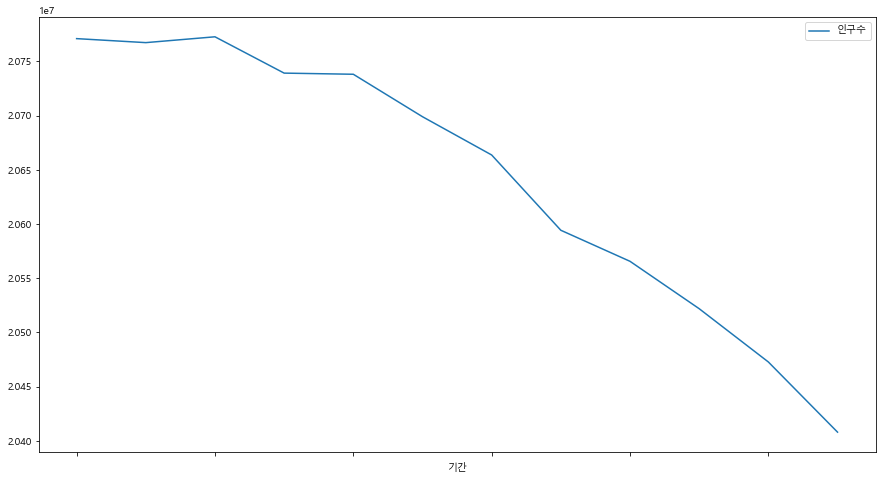

In [9]:
pop_pivot.plot(y=['인구수'],figsize=(15,8))
plt.legend(loc='best') #legend :범례추가, loc 위치 , best : 적절한 위치 자동표시
plt.show()

In [12]:
pop[pop['기간']=='2016.4/4']

,기간,구별,인구수,한국인,외국인,고령자
286,2016.4/4,합계,10204057.0,9930616.0,273441.0,1300877.0
287,2016.4/4,종로구,161922.0,152737.0,9185.0,25091.0
288,2016.4/4,중구,134409.0,125249.0,9160.0,20606.0
289,2016.4/4,용산구,245102.0,230241.0,14861.0,35915.0
290,2016.4/4,성동구,307161.0,299259.0,7902.0,39262.0
291,2016.4/4,광진구,372104.0,357215.0,14889.0,41441.0
292,2016.4/4,동대문구,370312.0,355069.0,15243.0,53460.0
293,2016.4/4,중랑구,415677.0,411005.0,4672.0,55914.0
294,2016.4/4,성북구,461617.0,450355.0,11262.0,64015.0
295,2016.4/4,강북구,330704.0,327195.0,3509.0,54053.0


In [13]:
pop_16=pop.iloc[286:312]  #iloc :  행, 열 번호를 이용해 데이터에 접근, 일부의 데이터를 지정한 변수에 저장
pop_16

,기간,구별,인구수,한국인,외국인,고령자
286,2016.4/4,합계,10204057.0,9930616.0,273441.0,1300877.0
287,2016.4/4,종로구,161922.0,152737.0,9185.0,25091.0
288,2016.4/4,중구,134409.0,125249.0,9160.0,20606.0
289,2016.4/4,용산구,245102.0,230241.0,14861.0,35915.0
290,2016.4/4,성동구,307161.0,299259.0,7902.0,39262.0
291,2016.4/4,광진구,372104.0,357215.0,14889.0,41441.0
292,2016.4/4,동대문구,370312.0,355069.0,15243.0,53460.0
293,2016.4/4,중랑구,415677.0,411005.0,4672.0,55914.0
294,2016.4/4,성북구,461617.0,450355.0,11262.0,64015.0
295,2016.4/4,강북구,330704.0,327195.0,3509.0,54053.0


In [14]:
pop_16['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [15]:
pop_16[pop_16['구별']=='합계']

,기간,구별,인구수,한국인,외국인,고령자
286,2016.4/4,합계,10204057.0,9930616.0,273441.0,1300877.0


In [16]:
pop_16.drop([286],inplace=True)

C:\Users\go113\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
pop_16['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [18]:
del pop_16['기간'] #del : 컬럼 삭제
pop_16.head()

,구별,인구수,한국인,외국인,고령자
287,종로구,161922.0,152737.0,9185.0,25091.0
288,중구,134409.0,125249.0,9160.0,20606.0
289,용산구,245102.0,230241.0,14861.0,35915.0
290,성동구,307161.0,299259.0,7902.0,39262.0
291,광진구,372104.0,357215.0,14889.0,41441.0


In [50]:
park=pd.read_excel("parkinglot_in_seoul.xls", encoding="cp949")
park.head()

,기간,자치구,자동차등록대수,주차면수,주차장확보율
0,2014.0,총계,3013541.0,3821527.0,126.8
1,2014.0,종로구,50315.0,86477.0,171.9
2,2014.0,중구,55277.0,107330.0,194.2
3,2014.0,용산구,75450.0,108234.0,143.5
4,2014.0,성동구,91347.0,117670.0,128.8


In [51]:
park[park['기간']==2016.0]

,기간,자치구,자동차등록대수,주차면수,주차장확보율
52,2016.0,총계,3083007.0,3983291.0,129.2
53,2016.0,종로구,49471.0,78985.0,159.7
54,2016.0,중구,51604.0,102938.0,199.5
55,2016.0,용산구,75640.0,102472.0,135.5
56,2016.0,성동구,99529.0,122659.0,123.2
57,2016.0,광진구,97045.0,118742.0,122.4
58,2016.0,동대문구,97333.0,128517.0,132.0
59,2016.0,중랑구,112098.0,120644.0,107.6
60,2016.0,성북구,116446.0,150343.0,129.1
61,2016.0,강북구,76844.0,89323.0,116.2


In [52]:
park_16=park.iloc[52:77]

In [53]:
park_16

,기간,자치구,자동차등록대수,주차면수,주차장확보율
52,2016.0,총계,3083007.0,3983291.0,129.2
53,2016.0,종로구,49471.0,78985.0,159.7
54,2016.0,중구,51604.0,102938.0,199.5
55,2016.0,용산구,75640.0,102472.0,135.5
56,2016.0,성동구,99529.0,122659.0,123.2
57,2016.0,광진구,97045.0,118742.0,122.4
58,2016.0,동대문구,97333.0,128517.0,132.0
59,2016.0,중랑구,112098.0,120644.0,107.6
60,2016.0,성북구,116446.0,150343.0,129.1
61,2016.0,강북구,76844.0,89323.0,116.2


In [54]:
park_16['자치구'].unique()

array(['총계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구'], dtype=object)

In [55]:
park_16[park_16['자치구']=='총계']

,기간,자치구,자동차등록대수,주차면수,주차장확보율
52,2016.0,총계,3083007.0,3983291.0,129.2


In [56]:
park_16.drop([52],inplace=True)
park_16['자치구'].unique()

C:\Users\go113\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구'], dtype=object)

In [57]:
park_16

,기간,자치구,자동차등록대수,주차면수,주차장확보율
53,2016.0,종로구,49471.0,78985.0,159.7
54,2016.0,중구,51604.0,102938.0,199.5
55,2016.0,용산구,75640.0,102472.0,135.5
56,2016.0,성동구,99529.0,122659.0,123.2
57,2016.0,광진구,97045.0,118742.0,122.4
58,2016.0,동대문구,97333.0,128517.0,132.0
59,2016.0,중랑구,112098.0,120644.0,107.6
60,2016.0,성북구,116446.0,150343.0,129.1
61,2016.0,강북구,76844.0,89323.0,116.2
62,2016.0,도봉구,97059.0,111205.0,114.6


In [58]:
del park_16['기간']
park_16.head()

,자치구,자동차등록대수,주차면수,주차장확보율
53,종로구,49471.0,78985.0,159.7
54,중구,51604.0,102938.0,199.5
55,용산구,75640.0,102472.0,135.5
56,성동구,99529.0,122659.0,123.2
57,광진구,97045.0,118742.0,122.4


In [59]:
park_16.rename(columns={park_16.columns[0]:'구별'},inplace=True)

C:\Users\go113\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [60]:
park_16.head()

,구별,자동차등록대수,주차면수,주차장확보율
53,종로구,49471.0,78985.0,159.7
54,중구,51604.0,102938.0,199.5
55,용산구,75640.0,102472.0,135.5
56,성동구,99529.0,122659.0,123.2
57,광진구,97045.0,118742.0,122.4


In [63]:
data= pd.merge(pop_16, park_16,on='구별')

In [64]:
data.head()

,구별,인구수,한국인,외국인,고령자,자동차등록대수,주차면수,주차장확보율
0,종로구,161922.0,152737.0,9185.0,25091.0,49471.0,78985.0,159.7
1,중구,134409.0,125249.0,9160.0,20606.0,51604.0,102938.0,199.5
2,용산구,245102.0,230241.0,14861.0,35915.0,75640.0,102472.0,135.5
3,성동구,307161.0,299259.0,7902.0,39262.0,99529.0,122659.0,123.2
4,광진구,372104.0,357215.0,14889.0,41441.0,97045.0,118742.0,122.4


In [65]:
data.set_index('구별', inplace=True)
data.head()

,인구수,한국인,외국인,고령자,자동차등록대수,주차면수,주차장확보율
구별,,,,,,,
종로구,161922.0,152737.0,9185.0,25091.0,49471.0,78985.0,159.7
중구,134409.0,125249.0,9160.0,20606.0,51604.0,102938.0,199.5
용산구,245102.0,230241.0,14861.0,35915.0,75640.0,102472.0,135.5
성동구,307161.0,299259.0,7902.0,39262.0,99529.0,122659.0,123.2
광진구,372104.0,357215.0,14889.0,41441.0,97045.0,118742.0,122.4


In [66]:
data['test']=data['주차면수']/data['자동차등록대수']*100
data.head()

,인구수,한국인,외국인,고령자,자동차등록대수,주차면수,주차장확보율,test
구별,,,,,,,,
종로구,161922.0,152737.0,9185.0,25091.0,49471.0,78985.0,159.7,159.659194
중구,134409.0,125249.0,9160.0,20606.0,51604.0,102938.0,199.5,199.476785
용산구,245102.0,230241.0,14861.0,35915.0,75640.0,102472.0,135.5,135.473295
성동구,307161.0,299259.0,7902.0,39262.0,99529.0,122659.0,123.2,123.239458
광진구,372104.0,357215.0,14889.0,41441.0,97045.0,118742.0,122.4,122.357669


In [67]:
del data['test']
data.head()

,인구수,한국인,외국인,고령자,자동차등록대수,주차면수,주차장확보율
구별,,,,,,,
종로구,161922.0,152737.0,9185.0,25091.0,49471.0,78985.0,159.7
중구,134409.0,125249.0,9160.0,20606.0,51604.0,102938.0,199.5
용산구,245102.0,230241.0,14861.0,35915.0,75640.0,102472.0,135.5
성동구,307161.0,299259.0,7902.0,39262.0,99529.0,122659.0,123.2
광진구,372104.0,357215.0,14889.0,41441.0,97045.0,118742.0,122.4


In [68]:
data['인구당자동차등록율']=data['자동차등록대수']/data['인구수']*100
data.head()

,인구수,한국인,외국인,고령자,자동차등록대수,주차면수,주차장확보율,인구당자동차등록율
구별,,,,,,,,
종로구,161922.0,152737.0,9185.0,25091.0,49471.0,78985.0,159.7,30.552365
중구,134409.0,125249.0,9160.0,20606.0,51604.0,102938.0,199.5,38.393262
용산구,245102.0,230241.0,14861.0,35915.0,75640.0,102472.0,135.5,30.860621
성동구,307161.0,299259.0,7902.0,39262.0,99529.0,122659.0,123.2,32.402877
광진구,372104.0,357215.0,14889.0,41441.0,97045.0,118742.0,122.4,26.080074


In [73]:
data.sort_values(by='인구당자동차등록율', ascending=False)

,인구수,한국인,외국인,고령자,자동차등록대수,주차면수,주차장확보율,인구당자동차등록율
구별,,,,,,,,
강남구,572140.0,567115.0,5025.0,61931.0,242348.0,385848.0,159.2,42.358164
서초구,451477.0,447192.0,4285.0,50984.0,179949.0,279729.0,155.4,39.857844
중구,134409.0,125249.0,9160.0,20606.0,51604.0,102938.0,199.5,38.393262
영등포구,406779.0,370613.0,36166.0,51844.0,146180.0,168428.0,115.2,35.935975
송파구,664946.0,657831.0,7115.0,71064.0,222514.0,292077.0,131.3,33.463469
금천구,254654.0,235386.0,19268.0,32279.0,84684.0,116984.0,138.1,33.254534
강서구,602104.0,595485.0,6619.0,71062.0,196164.0,245727.0,125.3,32.579754
성동구,307161.0,299259.0,7902.0,39262.0,99529.0,122659.0,123.2,32.402877
구로구,449600.0,417551.0,32049.0,55705.0,140693.0,156050.0,110.9,31.292927


In [74]:
data.sort_values(by='주차장확보율', ascending=False)

,인구수,한국인,외국인,고령자,자동차등록대수,주차면수,주차장확보율,인구당자동차등록율
구별,,,,,,,,
중구,134409.0,125249.0,9160.0,20606.0,51604.0,102938.0,199.5,38.393262
종로구,161922.0,152737.0,9185.0,25091.0,49471.0,78985.0,159.7,30.552365
강남구,572140.0,567115.0,5025.0,61931.0,242348.0,385848.0,159.2,42.358164
서초구,451477.0,447192.0,4285.0,50984.0,179949.0,279729.0,155.4,39.857844
마포구,390887.0,379892.0,10995.0,48303.0,117071.0,166655.0,142.4,29.950088
금천구,254654.0,235386.0,19268.0,32279.0,84684.0,116984.0,138.1,33.254534
서대문구,325871.0,314194.0,11677.0,47653.0,84358.0,115378.0,136.8,25.886931
용산구,245102.0,230241.0,14861.0,35915.0,75640.0,102472.0,135.5,30.860621
동대문구,370312.0,355069.0,15243.0,53460.0,97333.0,128517.0,132.0,26.284052


In [75]:
data.sort_values(by='자동차등록대수', ascending=False)

,인구수,한국인,외국인,고령자,자동차등록대수,주차면수,주차장확보율,인구당자동차등록율
구별,,,,,,,,
강남구,572140.0,567115.0,5025.0,61931.0,242348.0,385848.0,159.2,42.358164
송파구,664946.0,657831.0,7115.0,71064.0,222514.0,292077.0,131.3,33.463469
강서구,602104.0,595485.0,6619.0,71062.0,196164.0,245727.0,125.3,32.579754
서초구,451477.0,447192.0,4285.0,50984.0,179949.0,279729.0,155.4,39.857844
노원구,571212.0,567581.0,3631.0,70887.0,155697.0,175675.0,112.8,27.257306
양천구,481845.0,477739.0,4106.0,52063.0,150208.0,161764.0,107.7,31.173510
영등포구,406779.0,370613.0,36166.0,51844.0,146180.0,168428.0,115.2,35.935975
구로구,449600.0,417551.0,32049.0,55705.0,140693.0,156050.0,110.9,31.292927
은평구,495937.0,491476.0,4461.0,71457.0,127647.0,157635.0,123.5,25.738551


In [76]:
import seaborn as sns

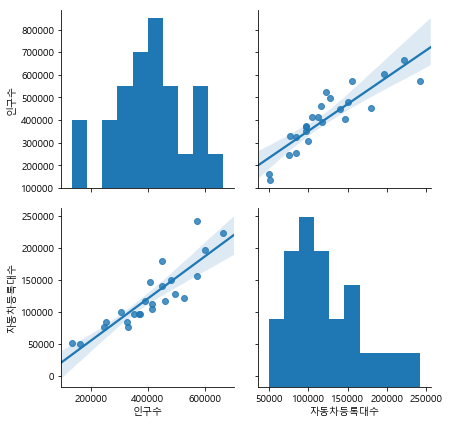

In [78]:
sns.pairplot(data,vars=['인구수','자동차등록대수'],kind='reg',size=3)

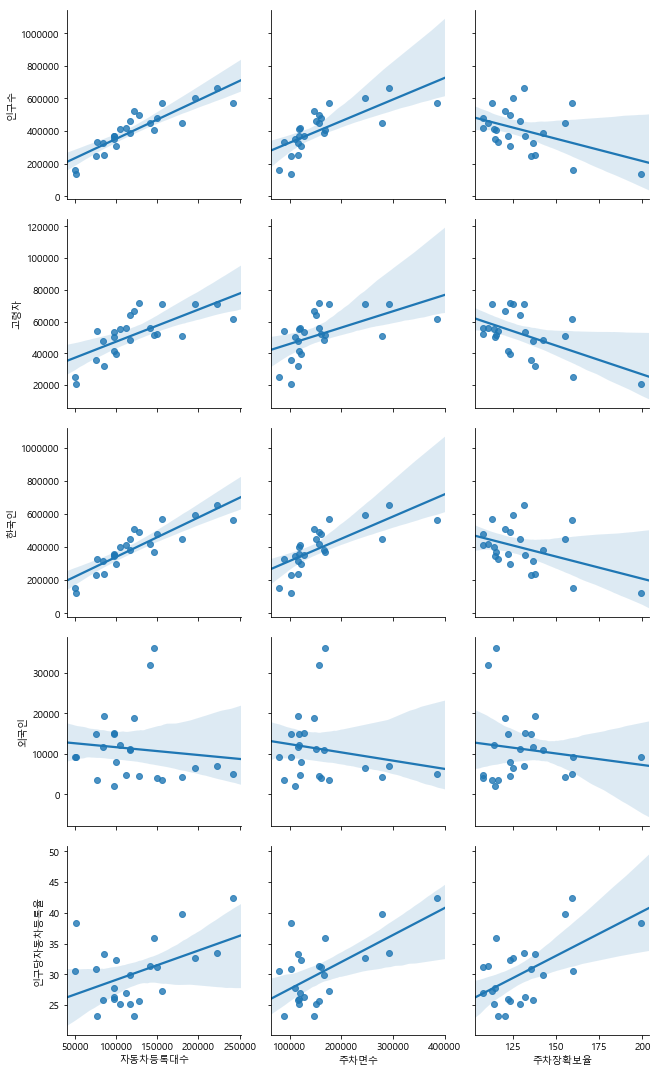

In [79]:
sns.pairplot(data,x_vars=['자동차등록대수','주차면수','주차장확보율'],y_vars=['인구수','고령자','한국인','외국인','인구당자동차등록율'],kind='reg',size=3)

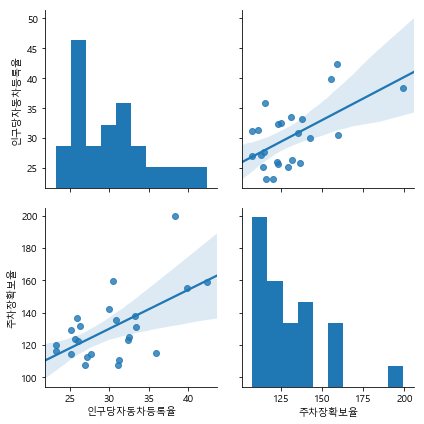

In [80]:
sns.pairplot(data,vars=['인구당자동차등록율','주차장확보율'],kind='reg',size=3)

In [81]:
np.corrcoef(data['인구수'],data['자동차등록대수'])

array([[1.        , 0.88278345],
       [0.88278345, 1.        ]])

In [82]:
np.corrcoef(data['인구수'],data['주차장확보율'])

array([[ 1.        , -0.43759279],
       [-0.43759279,  1.        ]])

In [83]:
np.corrcoef(data['인구수'],data['인구당자동차등록율'])

array([[1.        , 0.00155706],
       [0.00155706, 1.        ]])

In [84]:
np.corrcoef(data['주차장확보율'],data['자동차등록대수'])

array([[ 1.        , -0.13748533],
       [-0.13748533,  1.        ]])

In [85]:
import wordcloud